# 비정상 절차서 60-02 : 재생열교환기 전단부위 파열

## 1.0 데이터 처리

경보 및 증상

자동 동작사항

긴급 조치사항

후속 조치사항

In [1]:
import pickle
import matplotlib.pyplot as plt
from collections import deque
with open('D:/1.All_python_project/New_CNS_db/ab60_02_403.pkl', 'rb') as f:
    db = pickle.load(f)
sym_ch = {0:deque(maxlen=5), 1:deque(maxlen=5), 2:deque(maxlen=5), 3:deque(maxlen=5),
          4:deque(maxlen=5), 5:deque(maxlen=5), 6:deque(maxlen=5), 7:deque(maxlen=5),
          8:deque(maxlen=5), 9:deque(maxlen=5)}

## 2.0 경보 및 증상

### 2.1 유출수 유량지시계(BG-FI150) 지시치 감소 및 유출수 열교환기 출구유량 ‘저’ 경보(15㎥/hr) 발생 => 만족

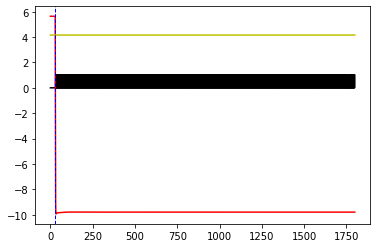

In [40]:
# KLAMPO260 : ALARM: L/D HX OUTLET FLOW LOW(15 M3/HR) 
# WNETLD ; NET LETDOWN FLOW.
# CWLHXL : 유출수 열교환기 출구유량 저 setpoint
plt.plot(db['KLAMPO260'], color='k')
plt.plot(db['WNETLD'], color='r')
plt.plot(db['CWLHXL'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [41]:
let_down_flow = []
for i in range(len(db)):
    if db['WNETLD'][i] < db['CWLHXL'][i]:
        let_down_flow.append(i+1)
if len(let_down_flow) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 유출수 열교환기 출구유량 저 경보 증상 만족 시간 : {let_down_flow[0]}초')

최초 유출수 열교환기 출구유량 저 경보 증상 만족 시간 : 30초


Report
1. KLAMPO260 로직 확인 필요 ; 
2. 유출수 유량지시계 관련 변수 확인 필요

### 2.2 VCT 수위지시계(BG-LI112A/LI115) 지시치 감소 및 다음 증상 발생 => 만족

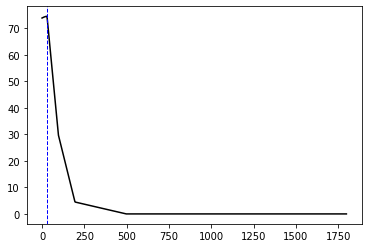

In [42]:
# ZVCT : VCT 수위
plt.plot(db['ZVCT'], color='k') # -> 수위 감소 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [43]:
vct_level = []
for i in range(len(db)):
    if i > 29:
        sym_ch[0].append(db['ZVCT'][i])
    if len(sym_ch[0]) == 5:
        if sym_ch[0][0] > sym_ch[0][1] > sym_ch[0][2] > sym_ch[0][3] > sym_ch[0][4]:
            vct_level.append(i+1)
#             print(f'수위 감소 증상 만족 시간 : {i+1}초')
print(f'최초 수위 감소 증상 만족 시간 : {vct_level[0]}초')

최초 수위 감소 증상 만족 시간 : 35초


### 2.2.1 VCT 수위 30% 이하시 원자로보충수계통 ‘자동’ 위치에서 자동 보충 => 만족

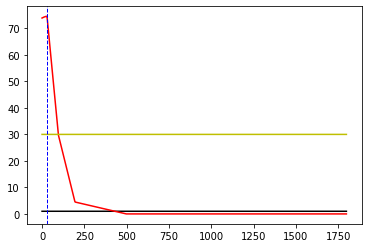

In [44]:
# KLAMPO86 : MAKE-UP MODE(AUTO)
# ZVCT : VCT 수위
# CZVCT3 : VCT LEVEL SETPOINT 30%(AUTO MAKE-UP START)
plt.plot(db['KLAMPO86'], color='k')
plt.plot(db['ZVCT'], color='r')
plt.plot(db['CZVCT3'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

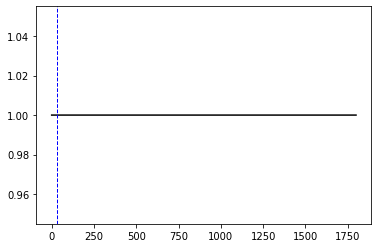

In [6]:
plt.plot(db['KLAMPO86'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [9]:
vct_level_30 = []
for i in range(len(db)):
    if i > 29:
        if db['ZVCT'][i] < db['CZVCT3'][i] and db['KLAMPO86'][i] == 1:
            vct_level_30.append(i+1)
if len(vct_level_30) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 원자로보충수계통 자동 위치에서 보충 시간 : {vct_level_30[0]}초')

최초 원자로보충수계통 자동 위치에서 보충 시간 : 97초


Report
1. 처음부터 자동 위치에서 보충 중이다.
2. 30% 이하일 때를 기준으로 해야 하는지, 자동 위치에서 보충하는 시간을 기준으로 해야 할지 의문.

### 2.2.2 VCT 수위 20% 이하시 VCT 수위 ‘저’ 경보 => 만족

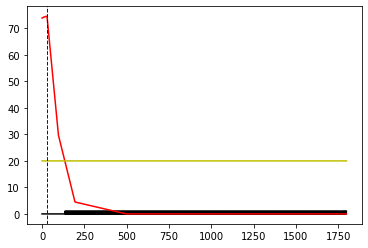

In [47]:
# KLAMPO263 : ALARM: VCT LEVEL LOW(20 %)
# ZVCT : VCT 수위
# CZVCT2 : VCT LEVEL SETPOINT 20%(LOW ALARM)
plt.plot(db['KLAMPO263'], color='k')
plt.plot(db['ZVCT'], color='r')
plt.plot(db['CZVCT2'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [10]:
vct_level_20 = []
for i in range(len(db)):
    if i > 29:
        if db['ZVCT'][i] < db['CZVCT2'][i] and db['KLAMPO263'][i]==1:
            vct_level_20.append(i+1)
if len(vct_level_20) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 VCT 수위 20% 이하시 VCT 수위 "저" 경보 시간 : {vct_level_20[0]}초')

최초 VCT 수위 20% 이하시 VCT 수위 "저" 경보 시간 : 136초


### 2.2.3 VCT 수위 5% 이하시 충전펌프 흡입원이 VCT에서 RWST로 전환 BG-LV115B/LV115D Open, BG-LV115C/LV115E Close

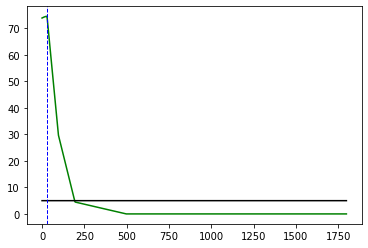

In [58]:
# CZVCT1 : VCT LEVEL SETPOINT 5%(CLOSE LV616, OPEN LV615)
# ZVCT : VCT 수위
plt.plot(db['ZVCT'], color='g')
plt.plot(db['CZVCT1'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

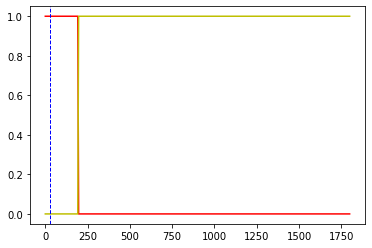

In [55]:
# BLV616 : VCT OUTLET ISO. VALVE(LV616) POSITION 
# BLV615 : RWST SUCTION ISO. VALVE(LV615) POSITION
plt.plot(db['BLV616'], color='r')
plt.plot(db['BLV615'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [12]:
vct_level_5, valve_state = [],[]
for i in range(len(db)):
    if i > 29:
        if db['ZVCT'][i] < db['CZVCT1'][i] and db['BLV616'][i] != 1 and db['BLV615'][i] != 0:
            vct_level_5.append(i+1)
#         if db['BLV616'][i] != 1 and db['BLV615'][i] != 0:
#             valve_state.append(i+1)
            
if len(vct_level_5) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 VCT 수위 5% 이하 및 충전펌프 흡입원이 VCT에서 RWST로 전환 시간 : {vct_level_5[0]}초')    
    
# if len(valve_state) == 0:
#     print('증상을 만족하지 못했습니다.')
# else:
#     print(f'충전펌프 흡입원이 VCT에서 RWST로 전환된 시간 : {valve_state[0]}초')

최초 VCT 수위 5% 이하 및 충전펌프 흡입원이 VCT에서 RWST로 전환 시간 : 194초


Report

 충전펌프 흡인원을 VCT 와 RWST 밸브 상태로 표현함
 
 밸브가 완전히 닫히고 열리는데 4초가량의 시간이 소요됨
 
 따라서 밸브상태가 변하는 시작시간으로 표현함.

### 2.3 가압기 수위 ‘저’ 편차 경보(기준수위 - 5%) 발생

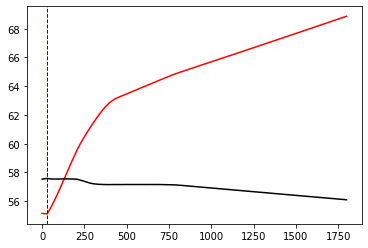

In [70]:
# ZINST63 : 가압기 수위
# ZINST57 : 가압기 수위 SETPOINT
plt.plot(db['ZINST63'], color='r')
plt.plot(db['ZINST57'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

가압기 기준수위? 평균 수위 찾아야함

### 2.4 가압기 압력 ‘저’ 전열기 작동 경보(155.35kg/㎠) 발생 => 경보 증상 불만족

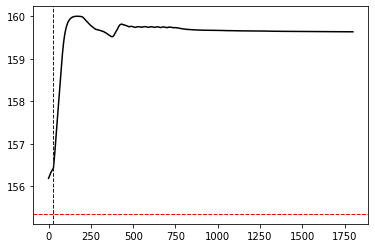

In [20]:
# PPRZ : 가압기 압력
# ZINST58 : 가압기 압력 kg단위
# plt.plot(db['PPRZ'], color='k') 
# plt.plot(db['CQPRZB'], color='y') 
plt.plot(db['ZINST58'], color='k') 
vline = plt.axhline(155.35, color='r', linestyle='--', linewidth=1)
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

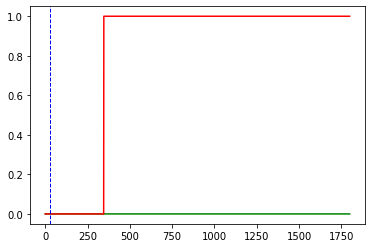

In [91]:
# KLAMPO312 : ALARM: PRZ PRESS LOW BACK-UP HEATER ON(153.6 KG/CM2) 
# KBHON : 가압기 보조전열기 상태 (1:켜짐)
plt.plot(db['KLAMPO312'], color='g') 
plt.plot(db['KBHON'],color='r') 
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [24]:
heater_on_al = []
for i in range(len(db)):
    if i > 29:
        if db['ZINST58'][i] < 155.35 and db['KBHON'][i] == 1:
            heater_on_al.append(i+1)
if len(heater_on_al) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 가압기 압력"저" 전열기 작동 경보(155.35kg/㎠) 발생 시간 : {heater_on_al[0]}초')

증상을 만족하지 못했습니다.


가압기 압력 저 => 불만족

전열기 작동 => 만족

따라서 가압기 압력 '저' 전열기 작동 경보 => 불만족

1. 압력이 높아지는데 전열기가 작동함 => 확인 필요

### 2.5 가압기 수위 ‘저’ 경보(17%) 및 다음 증상 발생 => 불만족

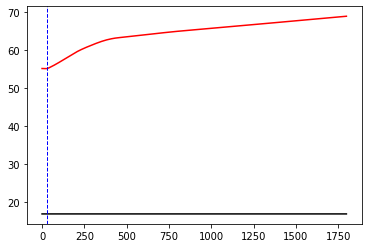

In [34]:
# KLAMPO311 : ALARM: PRZ cont level lo heater off
# ZINST63 : 가압기 수위
# CPZLOW : 가압기 수위 저 SETPOINT
plt.plot(db['ZINST63'], color='r') 
plt.plot(db['CPZLOW']*100, color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [125]:
pzr_level_lo = []
for i in range(len(db)):
    if i > 29:
        if db['ZINST63'][i] < db['CPZLOW'][i]:
            pzr_level_lo.append(i+1)
if len(pzr_level_lo) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 가압기 수위‘저’경보(17%) 발생 시간 : {pzr_level_lo[0]}초')

증상을 만족하지 못했습니다.


### 2.5.1 가압기 모든 전열기 꺼짐

0             0.0
1             0.0
2             0.0
3             0.0
4             0.0
          ...    
1795    1000000.0
1796    1000000.0
1797    1000000.0
1798    1000000.0
1799    1000000.0
Name: QPRZB, Length: 1800, dtype: float64


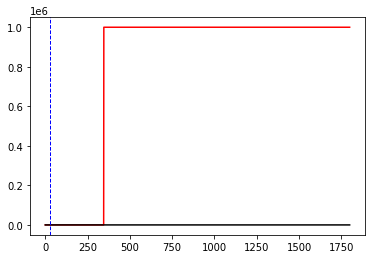

In [109]:
# QPRZB : 보조전열기 power
# QPRZH : 비례전열기 power
plt.plot(db['QPRZB'], color='r') 
plt.plot(db['QPRZH'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)
print(db['QPRZB'])

In [124]:
heat_power = []
for i in range(len(db)):
    if i > 29:
        if db['QPRZB'][i] < 0.001 and db['QPRZH'][i] < 0.001:
            heat_power.append(i+1)
if len(heat_power) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 가압기의 모든 전열기 꺼짐 시간 : {heat_power[0]}초')

최초 가압기의 모든 전열기 꺼짐 시간 : 66초


### Report (재확인)

불만족 사항임에도 불구하고 초반에 만족함으로써, 만족한 사항으로 인식됨.

불반족 했을때의 시간도 체크할 필요가 있어보임.

### 2.5.2 유출수 차단발생(BG-LV459/LV460, BG-HV1/HV2/HV3 닫힘)

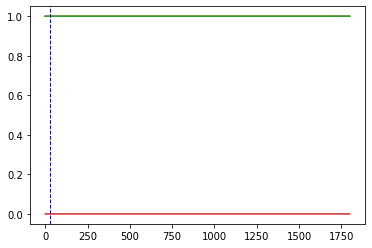

In [122]:
# BLV459
# BHV1
# BHV2
# BHV3
plt.plot(db['BLV459']) 
plt.plot(db['BHV1'])
plt.plot(db['BHV2']) 
plt.plot(db['BHV3'])
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [126]:
valve_state_0 = []
for i in range(len(db)):
    if i > 29:
        if db['BLV459'][i] == 0 and db['BHV1'][i] == 0 and db['BHV2'][i] == 0 and db['BHV3'][i] == 0:
            valve_state_0.append(i+1)
if len(valve_state_0) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 유출수 차단발생 시간 : {valve_state_0[0]}초')

증상을 만족하지 못했습니다.


### 2.6 재생 열교환기 후단 유출수 온도(BG-TI140) 감소

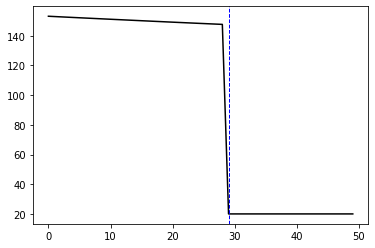

In [165]:
# URHXUT : RHX OUTLET TEMPERATURE.
plt.plot(db['URHXUT'].iloc[:50], color='k') 
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [160]:
rhx_outlet_temp = []
for i in range(len(db)):
    if i > 29:
        sym_ch[1].append(db['URHXUT'][i])
    if len(sym_ch[1]) == 5:
        if sym_ch[1][0] > sym_ch[1][1] > sym_ch[1][2] > sym_ch[1][3] > sym_ch[1][4]:
            rhx_outlet_temp.append(i+1)
#             print(f'수위 감소 증상 만족 시간 : {i+1}초')
if len(rhx_outlet_temp) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 재생 열교환기 후단 유출수 온도 감소 증상 만족 시간 : {rhx_outlet_temp[0]}초')

증상을 만족하지 못했습니다.


Report

malfunction 주입 전에 감소합니다.

### 2.7 재생 열교환기 후단 충전수 온도(BG-TI123) 감소

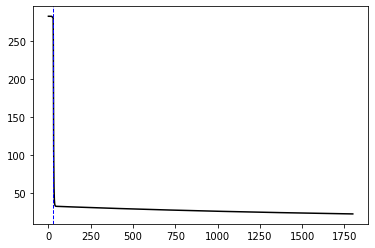

In [152]:
# UCHGUT : CHARGING LINE OUTLET TEMPERATURE
plt.plot(db['UCHGUT'], color='k') 
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [168]:
charging_outlet_temp = []
for i in range(len(db)):
    if i > 29:
        sym_ch[2].append(db['UCHGUT'][i])
    if len(sym_ch[2]) == 5:
        if sym_ch[2][0] > sym_ch[2][1] > sym_ch[2][2] > sym_ch[2][3] > sym_ch[2][4]:
            charging_outlet_temp.append(i+1)
#             print(f'수위 감소 증상 만족 시간 : {i+1}초')
if len(charging_outlet_temp) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 재생 열교환기 후단 충전수 온도 감소 증상 만족 시간 : {charging_outlet_temp[0]}초')

최초 재생 열교환기 후단 충전수 온도 감소 증상 만족 시간 : 35초


### 2.8 격납용기 배수조 수위 증가

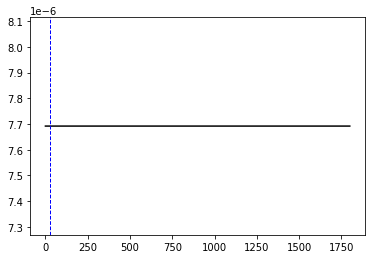

In [156]:
# ZSUMP : SUMP 수위
plt.plot(db['ZSUMP'], color='k') 
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [175]:
sump_level = []
for i in range(len(db)):
    if i > 29:
        sym_ch[3].append(db['ZSUMP'][i])
    if len(sym_ch[3]) == 5:
        if sym_ch[3][0] < sym_ch[3][1] < sym_ch[3][2] < sym_ch[3][3] < sym_ch[3][4]:
            sump_level.append(i+1)
#             print(f'수위 감소 증상 만족 시간 : {i+1}초')
if len(sump_level) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 격납용기 배수조 수위 증가 증상 만족 시간 : {sump_level[0]}초')

증상을 만족하지 못했습니다.


### 2.9 격납용기내 방사능준위 증가

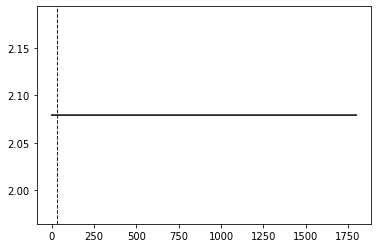

In [174]:
# ZINST22 : CONTAINMENT RADIATION            
plt.plot(db['ZINST22'], color='k') 
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [178]:
cont_rad = []
for i in range(len(db)):
    if i > 29:
        sym_ch[4].append(db['ZINST22'][i])
    if len(sym_ch[4]) == 5:
        if sym_ch[4][0] < sym_ch[4][1] < sym_ch[4][2] < sym_ch[4][3] < sym_ch[4][4]:
            cont_rad.append(i+1)
#             print(f'수위 감소 증상 만족 시간 : {i+1}초')
if len(cont_rad) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 격납용기내 방사능준위 증가 증상 만족 시간 : {cont_rad[0]}초')

증상을 만족하지 못했습니다.


### 2.10 격납용기내 습도 증가

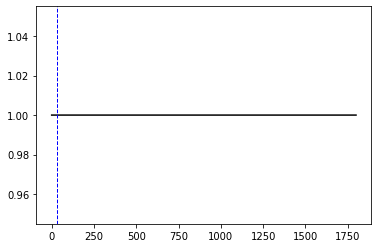

In [179]:
# ZINST23 : CONTAINMENT RELATIVE HUMIDITY      
plt.plot(db['ZINST23'], color='k') 
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [181]:
cont_humidity = []
for i in range(len(db)):
    if i > 29:
        sym_ch[5].append(db['ZINST23'][i])
    if len(sym_ch[5]) == 5:
        if sym_ch[5][0] < sym_ch[5][1] < sym_ch[5][2] < sym_ch[5][3] < sym_ch[5][4]:
            cont_humidity.append(i+1)
#             print(f'수위 감소 증상 만족 시간 : {i+1}초')
if len(cont_humidity) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 격납용기내 습도 증가 증상 만족 시간 : {cont_humidity[0]}초')

증상을 만족하지 못했습니다.


## 3.0 자동 동작사항

### 3.1 유출수 열교환기 출구 압력지시계(BG-PI145) 지시치 감소 및 압력조절밸브(BG-PV145) 서서히 닫힘

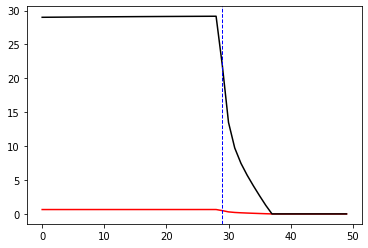

In [11]:
# BPV145 : 압력조절밸브 position (PV145)
# ZINST36 : letdown back pressure
plt.plot(db['BPV145'].iloc[:50], color='r')
plt.plot(db['ZINST36'].iloc[:50], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [12]:
letdown_back_pressure = []
for i in range(len(db)):
    if i > 29:
        sym_ch[6].append(db['BPV145'][i])
        sym_ch[7].append(db['ZINST36'][i])
    if len(sym_ch[6]) == 5:
        if sym_ch[6][0] > sym_ch[6][1] > sym_ch[6][2] > sym_ch[6][3] > sym_ch[6][4] and sym_ch[7][0] > sym_ch[7][1] > sym_ch[7][2] > sym_ch[7][3] > sym_ch[7][4]:
            letdown_back_pressure.append(i+1)
#             print(f'수위 감소 증상 만족 시간 : {i+1}초')
if len(letdown_back_pressure) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 유출수 열교환기 출구 압력지시계 지시치 감소 및 압력조절밸브 닫힘 시간 : {letdown_back_pressure[0]}초')

최초 유출수 열교환기 출구 압력지시계 지시치 감소 및 압력조절밸브 닫힘 시간 : 35초


### 3.2 유출수 열교환기 출구 온도지시계(BG-TI144) 지시치 감소 및 유출수 열교환기 출구 온도 조절밸브(EG-TV144) 서서히 닫힘

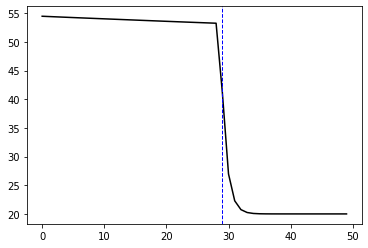

In [15]:
# UNRHXUT : NRHX OUTLET TEMPERATURE.
# BTV143 : TV143, LETDOWN TEMP. DEMINERALIZER DEVERT VALVE POSITION
plt.plot(db['UNRHXUT'].iloc[:50], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [18]:
letdown_back_temp = []
for i in range(len(db)):
    if i > 29:
        sym_ch[8].append(db['UNRHXUT'][i])
    if len(sym_ch[8]) == 5:
        if sym_ch[8][0] > sym_ch[8][1] > sym_ch[8][2] > sym_ch[8][3] > sym_ch[8][4]:
            letdown_back_temp.append(i+1)
#             print(f'수위 감소 증상 만족 시간 : {i+1}초')
if len(letdown_back_temp) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 유출수 열교환기 출구 압력지시계 지시치 감소 및 유출수 열교환기 출구 온도 조절밸브 닫힘 시간 : {letdown_back_temp[0]}초')

최초 유출수 열교환기 출구 압력지시계 지시치 감소 및 유출수 열교환기 출구 온도 조절밸브 닫힘 시간 : 35초


TV144을 확인할 수 없습니다.

TV143과 같은 밸브인지 확인이 필요합니다.

### 3.3 가압기 수위 감소에 따라 충전수 유량제어기(BG-FK122) ‘자동’ 상태에서 충전수 유량 조절밸브(BG-FV122) 서서히 열림

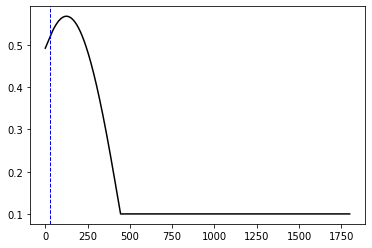

In [20]:
# BFV122 : CHARGING FLOW CONTROL VALVE(FV122) POSITION
plt.plot(db['BFV122'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [22]:
fv122_state = []
for i in range(len(db)):
    if i > 29:
        sym_ch[9].append(db['BFV122'][i])
    if len(sym_ch[9]) == 5:
        if sym_ch[9][0] < sym_ch[9][1] < sym_ch[9][2] < sym_ch[9][3] < sym_ch[9][4]:
            fv122_state.append(i+1)
#             print(f'수위 감소 증상 만족 시간 : {i+1}초')
if len(fv122_state) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 충전수 유량 조절밸브 열림 시간 : {fv122_state[0]}초')

최초 충전수 유량 조절밸브 열림 시간 : 34초


충전수 유량제어기 상태변수 확인 필요.

## 4.0 긴급 조치사항

주의사항
1. VCT 수위 30% 이하 자동보충 상태에서도 수위복구가 어려우면 수위 감소율을 감안하여 5% 도달 이전이라도 충전펌프의 흡입원을 RWST로 수동 전환한다.
   - 충전펌프 흡입원을 RWST로 수동 전환할 때는 RWST로부터의 흡입밸브(BG-LV115B/LV115D)를 먼저 열고 VCT 출구밸브(BG-LV115C/LV115E)를 닫는다.
2. 출력 증, 감발중일 경우 즉시 중지하고 현재 출력상태를 유지한다.

### 4.1 원자로보충수계통의 ‘자동’ 위치를 확인하고 VCT 수위가 30%에서 충수가 시작되는지를 확인한 다음 충수가 안되면 즉시 수동으로 충수한다.
	주) VCT 수위가 30% 이상이라도 필요한 경우 수동 보충운전을 수행한다.

### 4.2 가압기 수위를 유지하기 위해 다음과 같이 유출수계통을 차단한다.

### 4.2.1 유출수 오리피스차단밸브(BG-HV1/HV2/HV3)를 닫고 녹색지시등을 확인한다.

### 4.2.2 유출수 차단밸브(BG-LV459/LV460)를 닫고 녹색지시등을 확인한다.

### 4.3 가압기 수위가 계속 감소하면 ‘비정상-23(원자로냉각재계통 누설)’ 절차를 수행하고, 감소하지 않으면 다음 절차로 진행한다.

### 4.4 가압기 수위가 정상수위(기준수위 ± 5%)로 회복되면 충전수 유량 조절밸브(BG-FV122)를 닫아 충전수를 차단한다.

### 4.5 RCP 밀봉주입수 유량 조절밸브(BG-HV186)를 조절하여 각 펌프당 밀봉주입수 유량을 0.5～0.63ℓ/s(8～10gpm)로 맞춘다.

## 5.0 후속 조치사항